<div style="background-color: rgba(238, 238, 238, 0.6); padding: 10px; margin-left: 80%"><span style="display: block; color: black; font-size: 24px; text-align: right; font-weight: bold; text-shadow: 2px 2px 4px #999999;">Mashine Learning CA<br><br></span><span style="display: block; color: black; text-align: right; font-weight: bold; text-shadow: 2px 2px 4px #999999;">Zygimantas Jakubauskas<br></span></div>

<span style="color: blue;">

## Table of contents:
</span>

* [Introduction](#first-bullet)
* [1. Exploratory data analysis](#second-bullet)
** [1.1. Data dictionary](#eight-bullet)
** [1.2. Data exploration](#ninth-bullet)    
* [2. Data preparation](#fourth-bullet)    
* [3. Clustering](#twelwth-bullet)
** [3.1. K-Means clustering](#third-bullet)    
** [3.2. K-Medoids clustering](#fifth-bullet)    
* [4. Market Basket Analysis](#12th-bullet) 
** [4.1. Market Basket Analysis using Apriori algorithm](#sixth-bullet)    
** [4.2. Market Basket Analysis using Fpgrowth algorithm](#tenth-bullet)    
* [The End](#seventh-bullet)  

<span style="color: blue;">

## Introduction <a class="anchor" id="first-bullet"></a>

</span>

<span style="color: blue;">

## 1. Exploratory data analysis <a class="anchor" id="second-bullet"></a>

</span>

Importing relevant libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import normaltest
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing as preproc

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

from sklearn.metrics import silhouette_score

from scipy.stats import normaltest

from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth

In [2]:
df = pd.read_excel("data.xlsx")

Data is spread over two Excel sheets. 

In [3]:
ca1 = pd.read_excel("data.xlsx", 0)
ca2 = pd.read_excel("data.xlsx", 1)

Merging both datasets.

In [4]:
df = pd.concat([ca1, ca2])

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<span style="color: blue;">

### 1.1. Data dictionary <a class="anchor" id="eighth-bullet"></a>
    
</span>

<span style="color: blue;">

### 1.1 Data dictionary <a class="anchor" id="eight-bullet"></a>
    
</span>

__Invoice__ - Invoice number.

__StockCode__ - Item's code.

__Description__ - Description of the item.

__Quantity__ - Quantity of the items purchased.

__InvoiceDate__ - Date of the purchase.

__Price__ - Item price.

__CustomerID__ - ID of the customer.

__Country__ - Country of the buyer.


<span style="color: blue;">

### 1.1 Data exploration <a class="anchor" id="ninth-bullet"></a>
    
</span>

Getting datasets properties.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [7]:
df.shape

(1067371, 8)

In [8]:
df.describe(include = "all")

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371.0,1067371,1062989,1.067371e+06,1067371,1.067371e+06,824364.000000,1067371
unique,53628.0,5305,5698,NaN,47635,NaN,NaN,43
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,1350.0,5829,5918,NaN,1350,NaN,NaN,981330
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.938898e+00,NaN,4.649388e+00,15324.638504,NaN
std,NaN,NaN,NaN,1.727058e+02,NaN,1.235531e+02,1697.464450,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,-5.359436e+04,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13975.000000,NaN


Checking if the dataset contains duplicates and missing values.

In [9]:
df.duplicated().value_counts()

False    1033036
True       34335
dtype: int64

In [10]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Checking distributions of variables.

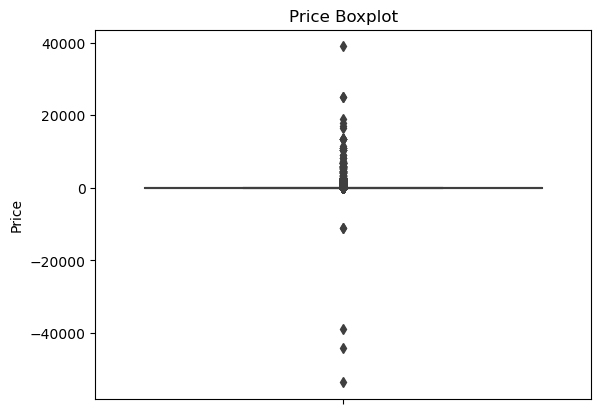

In [11]:
plot = sns.boxplot(y="Price", data=df)
plt.title("Price Boxplot")
plt.show()

In [12]:
df["Price"].describe()

count    1.067371e+06
mean     4.649388e+00
std      1.235531e+02
min     -5.359436e+04
25%      1.250000e+00
50%      2.100000e+00
75%      4.150000e+00
max      3.897000e+04
Name: Price, dtype: float64

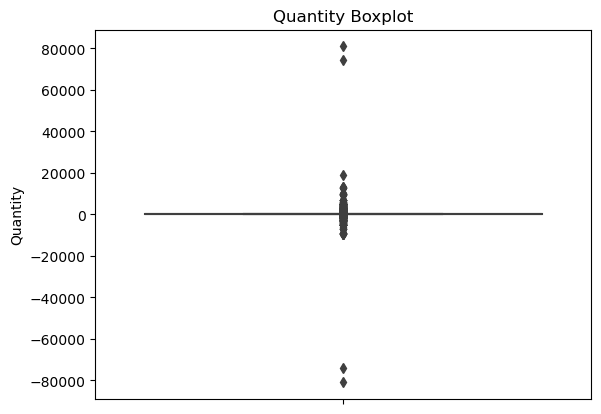

In [13]:
plot = sns.boxplot(y="Quantity", data=df)
plt.title("Quantity Boxplot")
plt.show()

In [14]:
df["Quantity"].describe()

count    1.067371e+06
mean     9.938898e+00
std      1.727058e+02
min     -8.099500e+04
25%      1.000000e+00
50%      3.000000e+00
75%      1.000000e+01
max      8.099500e+04
Name: Quantity, dtype: float64

<span style="color: blue;">

## 2. Data preparation <a class="anchor" id="fourth-bullet"></a>
    
</span>

Starting with dropping duplicates.

In [15]:
df = df.drop_duplicates()

As "Price" and "Quantity" contain negative values, that indicate returns and cancelations, these observations are dropped.

In [16]:
df = df[(df["Price"] > 0) & (df["Quantity"] > 0)]

In [17]:
df.shape

(1007914, 8)

In [19]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Checking if dataframe contains missing values.

In [20]:
df.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    228489
Country             0
dtype: int64

Making copy of the dataframe to use for Market Basket Analysis.

In [21]:
market_df = df

<span style="color: blue;">

## 3. Clustering <a class="anchor" id="twelwth-bullet"></a>
    
</span>

Preparing data for clustering. Removing all the observations with missing values.

In [22]:
clusters_df = df.dropna()

In [23]:
clusters_df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [24]:
clusters_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [25]:
clusters_df.shape

(779425, 8)

Building new dataframe for RFM analysis. RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. To do this dataframe is grouped by Customer ID, to create three new variables - "Value", "Frequency" and "Recency".

Starting with creating new variable "Value", by multiplying "Quantity" and unit's "Price". 

In [26]:
clusters_df["Value"] = clusters_df["Quantity"]*clusters_df["Price"]
rfm_value = clusters_df.groupby("Customer ID")["Value"].sum()
rfm_value = rfm_value.reset_index()
rfm_value.head()

,Customer ID,Value
0,12346.0,77556.46
1,12347.0,4921.53
2,12348.0,2019.40
3,12349.0,4428.69
4,12350.0,334.40


New variable "Frequency" is extracted by counting amount of invoices issued to the same customer.

In [27]:
rfm_frequency = clusters_df.groupby("Customer ID")["Invoice"].count()
rfm_frequency = rfm_frequency.reset_index()
rfm_frequency.columns = ["Customer ID", "Frequency"]
rfm_frequency.head()

,Customer ID,Frequency
0,12346.0,34
1,12347.0,222
2,12348.0,51
3,12349.0,175
4,12350.0,17


Merging two newly created dataframes into one.

In [28]:
rfm = pd.merge(rfm_value, rfm_frequency, on="Customer ID", how="inner")
rfm.head()

,Customer ID,Value,Frequency
0,12346.0,77556.46,34
1,12347.0,4921.53,222
2,12348.0,2019.40,51
3,12349.0,4428.69,175
4,12350.0,334.40,17


Adding the next new variable "Recency". This is calculating by extracting the last date of the whole dataset. New variable "Days" shows how many days have passed since the last order. "Days" contain not just days, but also hours, so hours get removed for the readability of the dataset. Days is created by taking InvoiceDate of the last date of the dataset which is 09/12/2011. 

In [29]:
last_date = max(clusters_df["InvoiceDate"])
print(last_date)

2011-12-09 12:50:00


In [31]:
clusters_df["Days"] = last_date - clusters_df["InvoiceDate"]
clusters_df["Days"] = clusters_df["Days"].dt.days
clusters_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Value,Days
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,738
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,738
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,738
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,738
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,738


Varable "Recency" is created by groupping "CustomerID" and "Days" and extracting the minimum value - which represents the most recent order.

In [32]:
rfm_recency = clusters_df.groupby("Customer ID")["Days"].min()
rfm_recency = rfm_recency.reset_index()
rfm_recency.head()

,Customer ID,Days
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


Merging "Recency" with the rest of the newly created dataframe.

In [33]:
rfm = pd.merge(rfm, rfm_recency, on='Customer ID', how="inner")
rfm.columns = ["Customer ID", "Value", "Frequency", "Recency"]
rfm.head()

,Customer ID,Value,Frequency,Recency
0,12346.0,77556.46,34,325
1,12347.0,4921.53,222,1
2,12348.0,2019.40,51,74
3,12349.0,4428.69,175,18
4,12350.0,334.40,17,309


Looking at the boxplots of "Value", "Frequency" and "Recency" to determine what scaling method to use.

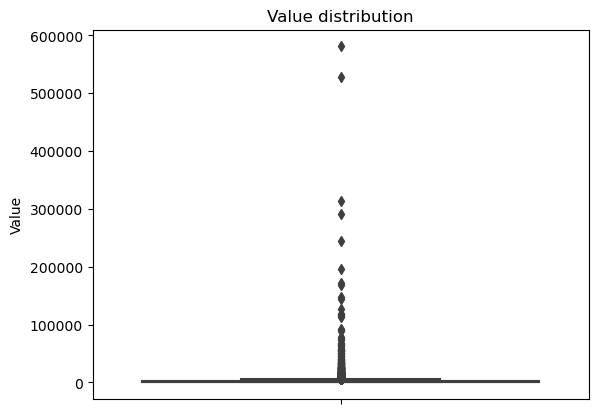

In [34]:
plot = sns.boxplot(y="Value", data=rfm)
plt.title("Value distribution")
plt.show()

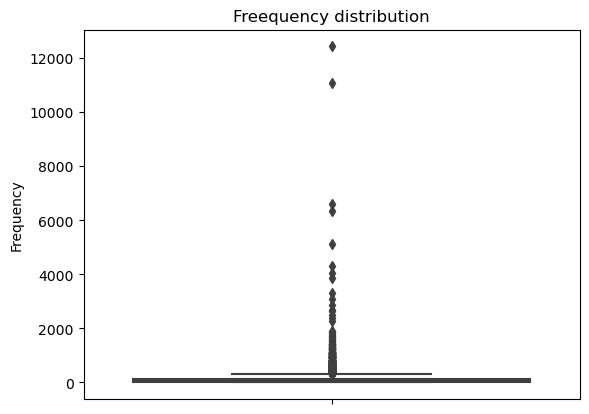

In [35]:
plot = sns.boxplot(y="Frequency", data=rfm)
plt.title("Freequency distribution")
plt.show()

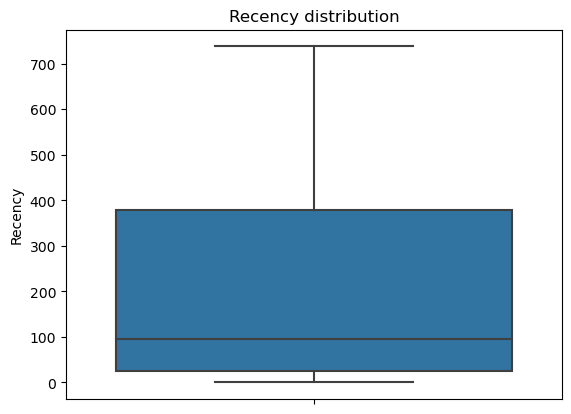

In [36]:
plot = sns.boxplot(y="Recency", data=rfm)
plt.title("Recency distribution")
plt.show()

In [37]:
rfm.describe()

,Customer ID,Value,Frequency,Recency
count,5878.000000,5878.000000,5878.000000,5878.000000
mean,15315.313542,2955.904095,132.600374,200.331916
std,1715.572666,14440.852688,342.190092,209.338707
min,12346.000000,2.950000,1.000000,0.000000
25%,13833.250000,342.280000,20.000000,25.000000
50%,15314.500000,867.740000,52.000000,95.000000
75%,16797.750000,2248.305000,138.000000,379.000000
max,18287.000000,580987.040000,12435.000000,738.000000


As data is skewed, and shows numerous outliers and large standard deviations, MinMax scaler is a best fit for this particular dataframe.

In [38]:
rfm_df = rfm[["Value", "Frequency", "Recency"]]
scaler = MinMaxScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(5878, 3)

In [39]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ["Value", "Frequency", "Recency"]
rfm_df_scaled.head()

,Value,Frequency,Recency
0,0.133486,0.002654,0.440379
1,0.008466,0.017774,0.001355
2,0.003471,0.004021,0.100271
3,0.007618,0.013994,0.024390
4,0.000570,0.001287,0.418699


Data now is scaled and ready for clustering.

<span style="color: blue;">

### 3.1. K-means clustering <a class="anchor" id="third-bullet"></a>
    
</span>

New dataframe name is assigned to be used for K-Means clustering.

In [40]:
rfm_df_scaled_kmeans = rfm_df_scaled

Determining ideal of number of clusters using two methods - Elbow method and Silhouette scores method. 

Starting with Elbow method.

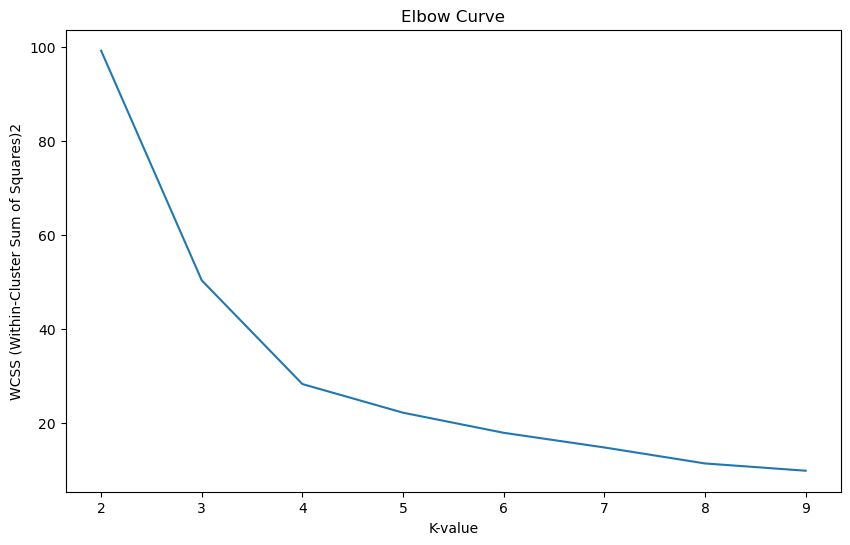

In [41]:
wcss = []

plt.figure(figsize=(10, 6))
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(rfm_df_scaled_kmeans)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,10), wcss)
plt.title("Elbow Curve")
plt.xlabel("K-value")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)2")
plt.show();

The plot doesn't show clear elbow point. Not a big difference between three or four clusters. 

Silhouette score uses different approach. It calculates silhouette coefficient to determine the ideal number of clusters. Silhouette coefficients range from -1 to 1, and as the result is closer to 1 as better. 

Calculating silhouette scores.

In [42]:
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(rfm_df_scaled_kmeans)
    score = silhouette_score(rfm_df_scaled_kmeans, y_kmeans)
    silhouette_scores.append(score)
    print(f"The silhouette score for {k} clusters is: {score}")

The silhouette score for 2 clusters is: 0.719812629322326
The silhouette score for 3 clusters is: 0.682350558383065
The silhouette score for 4 clusters is: 0.6606172511851864
The silhouette score for 5 clusters is: 0.596053449072624
The silhouette score for 6 clusters is: 0.5904933076532689
The silhouette score for 7 clusters is: 0.5325912983624873
The silhouette score for 8 clusters is: 0.5466488659178053
The silhouette score for 9 clusters is: 0.5385350442511403


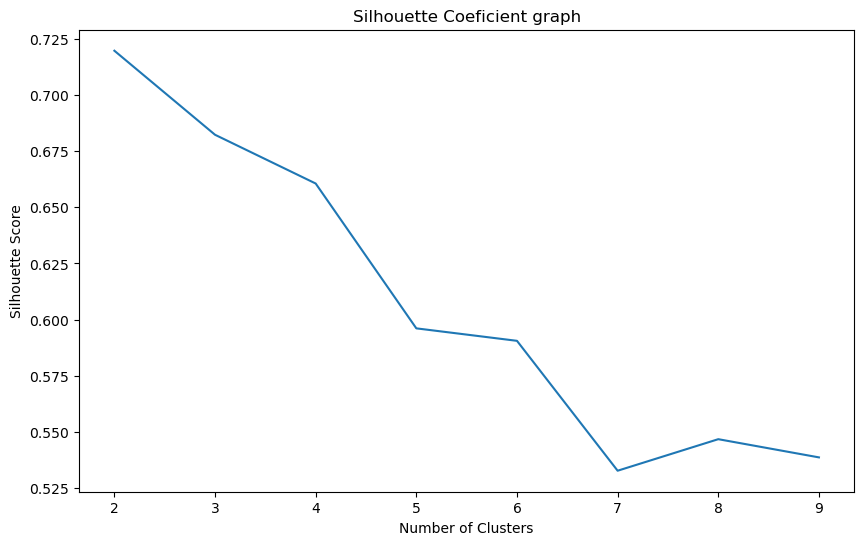

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores)

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Coeficient graph")
plt.show()

After performing both methods, Elbow and Silhouette scores, Silhouette produced slightly better result. Therefore for clusters visualisation 2 clusters will be used.

In [44]:
kmeans = KMeans(n_clusters = 2, random_state=42)
y_kmeans = kmeans.fit_predict(rfm_df_scaled)
rfm_df_scaled_kmeans["Cluster"] = y_kmeans
rfm_df_scaled_kmeans.head()

,Value,Frequency,Recency,Cluster
0,0.133486,0.002654,0.440379,1
1,0.008466,0.017774,0.001355,0
2,0.003471,0.004021,0.100271,0
3,0.007618,0.013994,0.024390,0
4,0.000570,0.001287,0.418699,1


Plotting scatterplot visualising K-Means clusters in 2 dimensions.

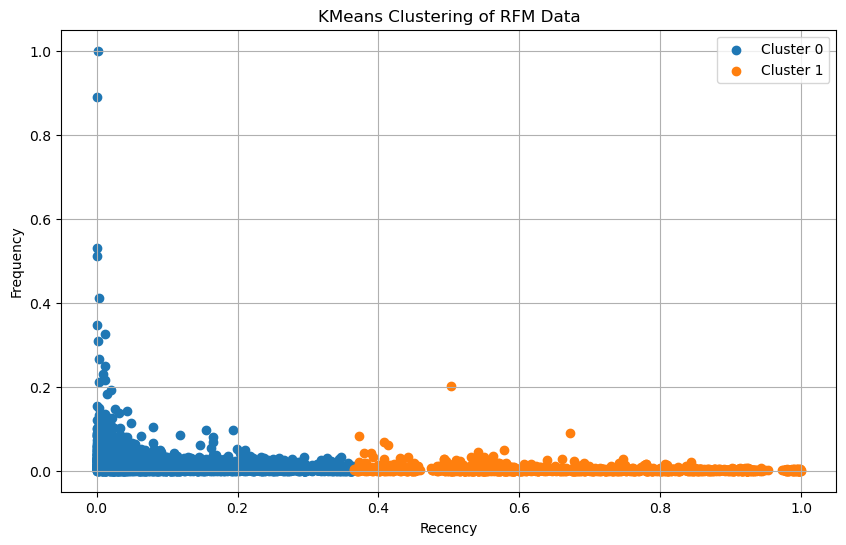

In [45]:
plt.figure(figsize=(10, 6))

for cluster in sorted(rfm_df_scaled["Cluster"].unique()):
    plt.scatter(rfm_df_scaled.loc[rfm_df_scaled_kmeans["Cluster"] == cluster, "Recency"],
                rfm_df_scaled.loc[rfm_df_scaled_kmeans["Cluster"] == cluster, "Frequency"],
                label=f'Cluster {cluster}',
                )

plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.title("KMeans Clustering of RFM Data")
plt.legend()
plt.grid(True)
plt.show()

Plotting 3D visualisation of RFM data.

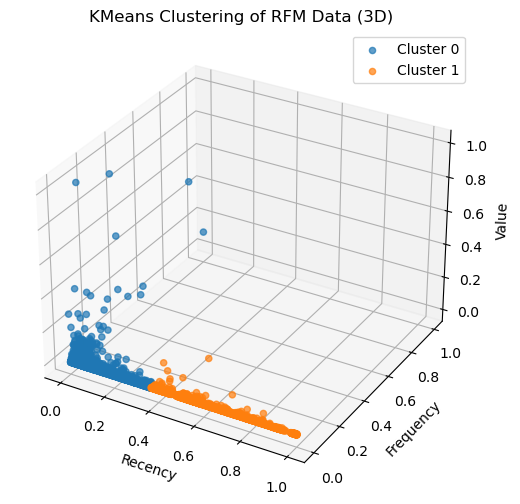

In [46]:
fig = plt.figure(figsize=(10, 6))
kmeans_ax = fig.add_subplot(111, projection="3d")

for cluster in sorted(rfm_df_scaled_kmeans["Cluster"].unique()):
    kmeans_ax.scatter(rfm_df_scaled_kmeans.loc[rfm_df_scaled_kmeans["Cluster"] == cluster, "Recency"],
                      rfm_df_scaled_kmeans.loc[rfm_df_scaled_kmeans["Cluster"] == cluster, "Frequency"],
                      rfm_df_scaled_kmeans.loc[rfm_df_scaled_kmeans["Cluster"] == cluster, "Value"],
                      label=f'Cluster {cluster}',
                      alpha=0.7)

kmeans_ax.set_xlabel("Recency")
kmeans_ax.set_ylabel("Frequency")
kmeans_ax.set_zlabel("Value")
plt.title("KMeans Clustering of RFM Data (3D)")
plt.legend()
plt.grid(True)
plt.show()

<span style="color: blue;">

### 3.2. K-Medoids clustering <a class="anchor" id="fifth-bullet"></a>
    
</span>

Separate dataframe is allocated for K-Meadoids.

In [47]:
rfm_df_scaled_medoids = rfm_df_scaled

K-Meadoids uses meadoids – “points in the cluster within a dataset from which the sum of distances to other points is minimal

K-Medoids calculates wcss similarly to K-Means but instead of inertia, which measures how tightly the clusters are packed together it uses pairwise distances, which measure the distances between all pairs of data points in the dataset.

Calculating wcss using "pam" method, "euclidean" metric.

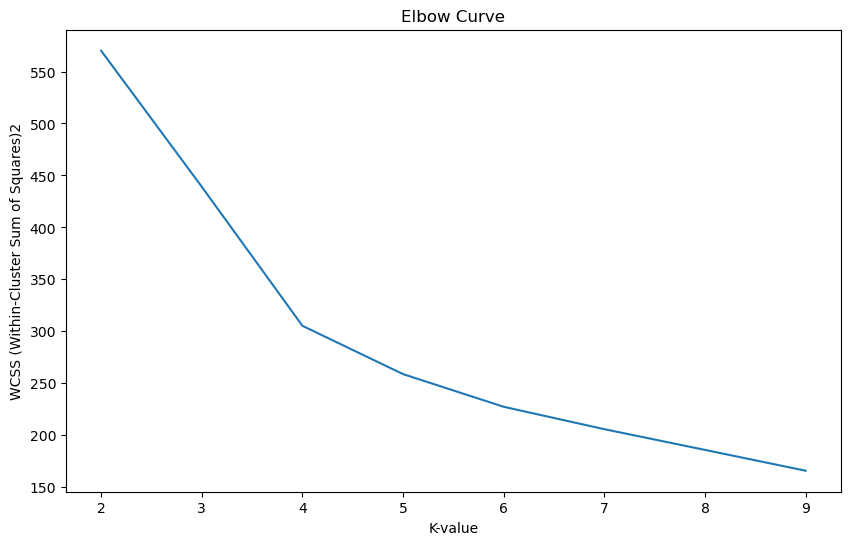

In [48]:
wcss_medoids = []
plt.figure(figsize=(10, 6))

for k in range(2, 10):
    kmedoids = KMedoids(n_clusters=k, method="pam", random_state=300)
    kmedoids.fit(rfm_df_scaled_medoids)
    wcss_medoids.append(sum(np.min(pairwise_distances(rfm_df_scaled_medoids, kmedoids.cluster_centers_, metric="euclidean"), axis=1)))

plt.plot(range(2,10), wcss_medoids)
plt.title("Elbow Curve")
plt.xlabel("K-value")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)2")
plt.show();

Calculating Silhouette scores for K-Medoids.

In [49]:
s_scores_medoids = []
for k in range(2, 10):
    kmedoids = KMedoids(n_clusters=k, method="pam", random_state=300)
    y_pred = kmedoids.fit_predict(rfm_df_scaled_medoids)
    s_score = silhouette_score(rfm_df_scaled_medoids, y_pred)
    s_scores_medoids.append(s_score)
    print(f"The silhouette score for {k} clusters is: {s_score}")

The silhouette score for 2 clusters is: 0.8801106336186576
The silhouette score for 3 clusters is: 0.8174740087785947
The silhouette score for 4 clusters is: 0.6693695794982921
The silhouette score for 5 clusters is: 0.568773167597936
The silhouette score for 6 clusters is: 0.5335006921649547
The silhouette score for 7 clusters is: 0.5184267869856756
The silhouette score for 8 clusters is: 0.49309624260775636
The silhouette score for 9 clusters is: 0.5119755743144134


Plotting calculated Silhouette scores.

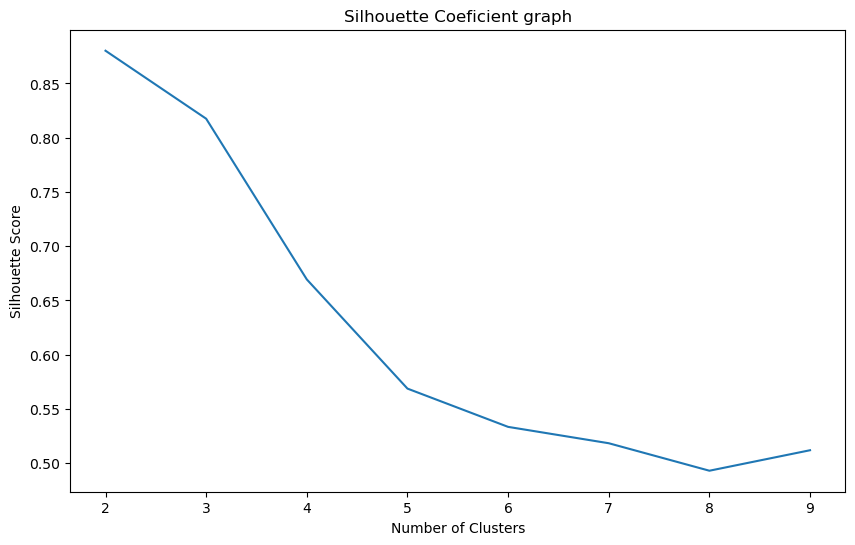

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), s_scores_medoids)

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Coeficient graph")
plt.show()

Silhouette method clearly indicates that best result is achieved when ideal number of clusters is 2. This number will be used for further calculations.

In [51]:
kmedoids = KMedoids(n_clusters=2, method="pam", random_state=300)
y_kmedoids = kmedoids.fit_predict(rfm_df_scaled_medoids)
rfm_df_scaled_medoids["Cluster"] = y_kmedoids
rfm_df_scaled_medoids.head()

,Value,Frequency,Recency,Cluster
0,0.133486,0.002654,0.440379,0
1,0.008466,0.017774,0.001355,1
2,0.003471,0.004021,0.100271,1
3,0.007618,0.013994,0.024390,1
4,0.000570,0.001287,0.418699,0


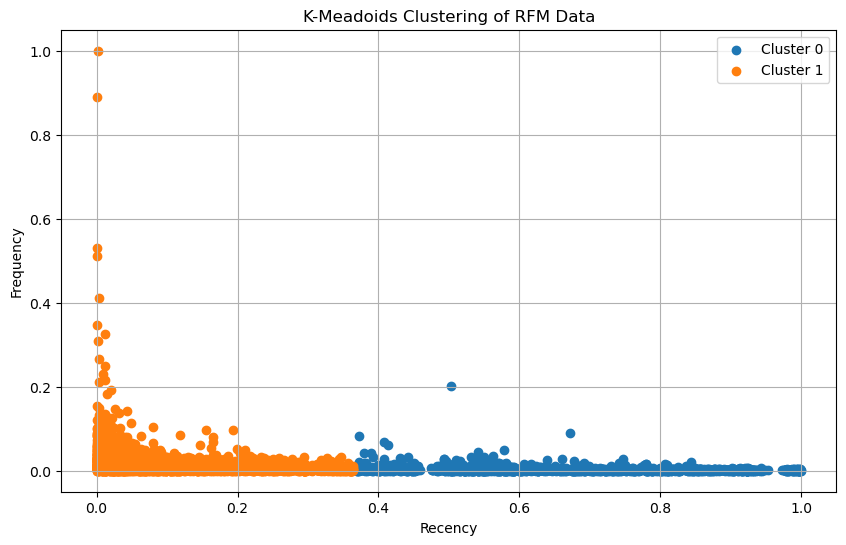

In [52]:
plt.figure(figsize=(10, 6))

for cluster in sorted(rfm_df_scaled_medoids["Cluster"].unique()):
    plt.scatter(rfm_df_scaled_medoids.loc[rfm_df_scaled_medoids["Cluster"] == cluster, "Recency"],
                rfm_df_scaled_medoids.loc[rfm_df_scaled_medoids["Cluster"] == cluster, "Frequency"],
                label=f'Cluster {cluster}',
                )

plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.title("K-Meadoids Clustering of RFM Data")
plt.legend()
plt.grid(True)
plt.show()

Plotting 3D visualisation.

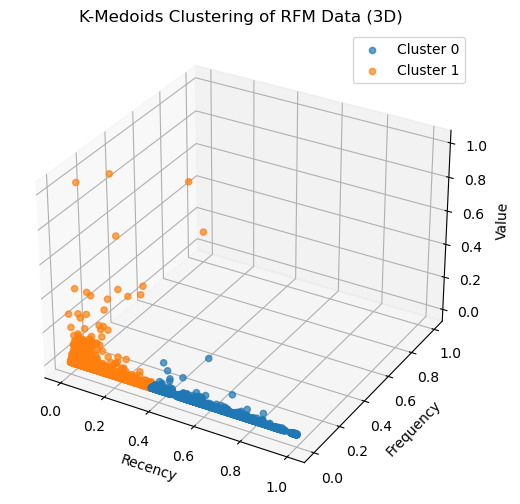

In [53]:
fig = plt.figure(figsize=(10, 6))
kmedoids_ax = fig.add_subplot(111, projection='3d')

for cluster in sorted(rfm_df_scaled["Cluster"].unique()):
    kmedoids_ax.scatter(rfm_df_scaled_medoids.loc[rfm_df_scaled_medoids["Cluster"] == cluster, "Recency"],
               rfm_df_scaled_medoids.loc[rfm_df_scaled_medoids["Cluster"] == cluster, "Frequency"],
               rfm_df_scaled_medoids.loc[rfm_df_scaled_medoids["Cluster"] == cluster, "Value"],
               label=f'Cluster {cluster}',
               alpha=0.7)

kmedoids_ax.set_xlabel("Recency")
kmedoids_ax.set_ylabel("Frequency")
kmedoids_ax.set_zlabel("Value")
plt.title('K-Medoids Clustering of RFM Data (3D)')
plt.legend()
plt.grid(True)
plt.show()

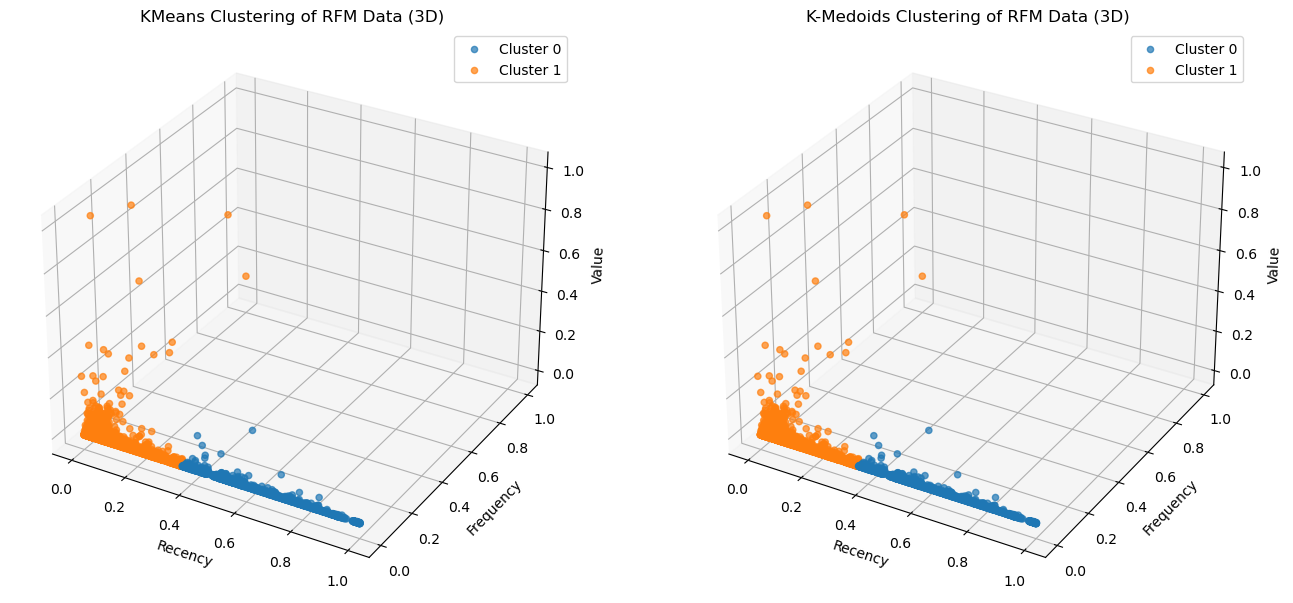

In [54]:
fig = plt.figure(figsize=(16, 8))

kmeans_ax = fig.add_subplot(121, projection="3d")
for cluster in sorted(rfm_df_scaled_kmeans["Cluster"].unique()):
    kmeans_ax.scatter(rfm_df_scaled_kmeans.loc[rfm_df_scaled["Cluster"] == cluster, "Recency"],
                      rfm_df_scaled_kmeans.loc[rfm_df_scaled["Cluster"] == cluster, "Frequency"],
                      rfm_df_scaled_kmeans.loc[rfm_df_scaled["Cluster"] == cluster, "Value"],
                      label=f'Cluster {cluster}',
                      alpha=0.7)
kmeans_ax.set_xlabel("Recency")
kmeans_ax.set_ylabel("Frequency")
kmeans_ax.set_zlabel("Value")
kmeans_ax.set_title("KMeans Clustering of RFM Data (3D)")
kmeans_ax.legend()
kmeans_ax.grid(True)

kmedoids_ax = fig.add_subplot(122, projection='3d')
for cluster in sorted(rfm_df_scaled["Cluster"].unique()):
    kmedoids_ax.scatter(rfm_df_scaled_medoids.loc[rfm_df_scaled_medoids["Cluster"] == cluster, "Recency"],
                        rfm_df_scaled_medoids.loc[rfm_df_scaled_medoids["Cluster"] == cluster, "Frequency"],
                        rfm_df_scaled_medoids.loc[rfm_df_scaled_medoids["Cluster"] == cluster, "Value"],
                        label=f'Cluster {cluster}',
                        alpha=0.7)
kmedoids_ax.set_xlabel("Recency")
kmedoids_ax.set_ylabel("Frequency")
kmedoids_ax.set_zlabel("Value")
kmedoids_ax.set_title('K-Medoids Clustering of RFM Data (3D)')
kmedoids_ax.legend()
kmedoids_ax.grid(True)

plt.show()

<span style="color: blue;">

## 4. Market Basket Analysis <a class="anchor" id="12th-bullet"></a>
    
</span>

For market basket analysis is used market_df dataframe which was saved during the early EDA. 

In [55]:
market_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [56]:
market_df.shape

(1007914, 8)

In [57]:
market_df.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    228489
Country             0
dtype: int64

In [58]:
market_df = market_df.drop(columns=["Customer ID"])

In [59]:
market_df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Country        0
dtype: int64

Now dataset contains no missing values.

In [60]:
market_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom


In [61]:
market_df.shape

(1007914, 7)

Grouping dataset by the "Invoice" and "Description" to create new dataframe which sums all the items bought during one transaction. "Invoice" is set as a new index.

In [62]:
full_basket = (market_df.groupby(["Invoice", "Description"])["Quantity"]
               .sum().unstack().fillna(0).reset_index().set_index("Invoice"))
full_basket.head()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
full_basket.shape

(40078, 5399)

As quantities vary, and some items are bought in multiple amount creating the function which assigning quantities to 1 for Market Basket analysis.

In [64]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
full_basket_encoded = full_basket.applymap(encode_units)
full_basket_encoded.head()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dataset is encoded and contains only zeros and ones.

As analysis requires couple of items in the same basket, to see what items are bought together, dataframe is filteres so baskets left are containing at least two items.

In [65]:
full_basket_encoded_filtered = full_basket_encoded[(full_basket_encoded > 0).sum(axis=1) >= 2]
full_basket_encoded_filtered

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


<span style="color: blue;">

## 4.1. Market Basket Analysis using Apriori algorithm <a class="anchor" id="sixth-bullet"></a>

</span>

Next, using Apriori algorithm freequent items are established. The parameter to find freequent items is set at 0.028, meaning that purchases need to appear at least 2.8% in the transactions. There are limitations to the calculations. As lower percentage there is as more computer memory it requires.

In [66]:
frequent_itemsets_apr = apriori(full_basket_encoded_filtered, min_support=0.028, 
                                 use_colnames=True).sort_values("support", ascending=False).reset_index(drop=True)

frequent_itemsets_apr["length"] = frequent_itemsets_apr["itemsets"].apply(lambda x: len(x))

frequent_itemsets_apr

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.148456,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.106161,(REGENCY CAKESTAND 3 TIER),1
2,0.089150,(JUMBO BAG RED RETROSPOT),1
3,0.076839,(ASSORTED COLOUR BIRD ORNAMENT),1
4,0.072771,(PARTY BUNTING),1
...,...,...,...
135,0.028443,(LUNCH BAG APPLE DESIGN),1
136,0.028388,(SPACEBOY BIRTHDAY CARD),1
137,0.028334,(DOORMAT HEARTS),1
138,0.028114,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",2


In [67]:
frequent_itemsets_apr.shape

(140, 3)

140 frequently bought items or item sets are established.

Filtering only purchases that have at least two items in the basket.

In [68]:
frequent_itemsets_apr[(frequent_itemsets_apr["length"]  == 2) & (frequent_itemsets_apr["support"] >= 0.028)]
frequent_itemsets_apr

,support,itemsets,length
0,0.148456,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.106161,(REGENCY CAKESTAND 3 TIER),1
2,0.089150,(JUMBO BAG RED RETROSPOT),1
3,0.076839,(ASSORTED COLOUR BIRD ORNAMENT),1
4,0.072771,(PARTY BUNTING),1
...,...,...,...
135,0.028443,(LUNCH BAG APPLE DESIGN),1
136,0.028388,(SPACEBOY BIRTHDAY CARD),1
137,0.028334,(DOORMAT HEARTS),1
138,0.028114,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",2


In [69]:
association_rules(frequent_itemsets_apr, metric="lift", 
                  min_threshold=1).sort_values("lift", ascending=False).reset_index(drop=True)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.038667,0.036798,0.028114,0.727079,19.758735,0.026691,3.529233,0.987576
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.036798,0.038667,0.028114,0.764003,19.758735,0.026691,4.073498,0.985660
2,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.040673,0.063318,0.028911,0.710811,11.226121,0.026335,3.238995,0.949543
3,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.063318,0.040673,0.028911,0.456597,11.226121,0.026335,1.765407,0.972498
4,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.054936,0.056475,0.030614,0.557279,9.867764,0.027512,2.131195,0.950898
5,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.056475,0.054936,0.030614,0.542092,9.867764,0.027512,2.063876,0.952449
6,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.063922,0.089150,0.030120,0.471195,5.285404,0.024421,1.722469,0.866167
7,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.089150,0.063922,0.030120,0.337855,5.285404,0.024421,1.413704,0.890157
8,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.048230,0.148456,0.034077,0.706553,4.759356,0.026917,2.901865,0.829914
9,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.148456,0.048230,0.034077,0.229545,4.759356,0.026917,1.235334,0.927594


<span style="color: blue;">

## 4.2. Market Basket Analysis using Fpgrowth algorithm <a class="anchor" id="tenth-bullet"></a>

</span>

The same dataset is analysed using Fpgrowth algorithm. All the same steps are taken as with Apriori.

In [70]:
frequent_itemsets_fpg = fpgrowth(full_basket_encoded_filtered, min_support=0.003, 
                                 use_colnames=True).sort_values("support", ascending=False).reset_index(drop=True)

frequent_itemsets_fpg["length"] = frequent_itemsets_fpg["itemsets"].apply(lambda x: len(x))

frequent_itemsets_fpg

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.148456,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.106161,(REGENCY CAKESTAND 3 TIER),1
2,0.089150,(JUMBO BAG RED RETROSPOT),1
3,0.076839,(ASSORTED COLOUR BIRD ORNAMENT),1
4,0.072771,(PARTY BUNTING),1
...,...,...,...
37411,0.003023,"(DOTCOM POSTAGE, 6 RIBBONS RUSTIC CHARM, WHITE...",4
37412,0.003023,"(DOLLY GIRL LUNCH BOX, JAM MAKING SET PRINTED,...",3
37413,0.003023,"(SUKI SHOULDER BAG, SMALL GLASS HEART TRINKET...",3
37414,0.003023,"(6 RIBBONS RUSTIC CHARM, JAM MAKING SET PRINTE...",3


In [71]:
frequent_itemsets_fpg[(frequent_itemsets_fpg["length"]  == 2) & (frequent_itemsets_fpg["support"] >= 0.003)]
frequent_itemsets_fpg

,support,itemsets,length
0,0.148456,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.106161,(REGENCY CAKESTAND 3 TIER),1
2,0.089150,(JUMBO BAG RED RETROSPOT),1
3,0.076839,(ASSORTED COLOUR BIRD ORNAMENT),1
4,0.072771,(PARTY BUNTING),1
...,...,...,...
37411,0.003023,"(DOTCOM POSTAGE, 6 RIBBONS RUSTIC CHARM, WHITE...",4
37412,0.003023,"(DOLLY GIRL LUNCH BOX, JAM MAKING SET PRINTED,...",3
37413,0.003023,"(SUKI SHOULDER BAG, SMALL GLASS HEART TRINKET...",3
37414,0.003023,"(6 RIBBONS RUSTIC CHARM, JAM MAKING SET PRINTE...",3


In [72]:
association_rules_fpg = association_rules(frequent_itemsets_fpg, metric="lift", min_threshold=1)
association_rules_fpg = association_rules_fpg.sort_values("lift", ascending=False).reset_index(drop=True)
association_rules_fpg

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(CHILDS GARDEN FORK PINK, CHILDS GARDEN TROWEL...","(CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN T...",0.003600,0.003628,0.003188,0.885496,244.101781,0.003175,8.701653,0.999502
1,"(CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN T...","(CHILDS GARDEN FORK PINK, CHILDS GARDEN TROWEL...",0.003628,0.003600,0.003188,0.878788,244.101781,0.003175,8.220299,0.999529
2,"(CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN T...","(CHILDS GARDEN TROWEL PINK, CHILDRENS GARDEN G...",0.003600,0.003655,0.003188,0.885496,242.266429,0.003175,8.701413,0.999470
3,"(CHILDS GARDEN TROWEL PINK, CHILDRENS GARDEN G...","(CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN T...",0.003655,0.003600,0.003188,0.872180,242.266429,0.003175,7.795364,0.999526
4,"(CHILDS GARDEN TROWEL PINK, CHILDS GARDEN FORK...","(CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN T...",0.003683,0.003628,0.003188,0.865672,238.636816,0.003175,7.417439,0.999490
...,...,...,...,...,...,...,...,...,...,...
178843,(ASSORTED COLOUR BIRD ORNAMENT),(RED TOADSTOOL LED NIGHT LIGHT),0.076839,0.041937,0.003325,0.043276,1.031934,0.000103,1.001400,0.033521
178844,(HEART OF WICKER SMALL),(BAKING SET 9 PIECE RETROSPOT ),0.058838,0.052105,0.003160,0.053713,1.030863,0.000095,1.001699,0.031811
178845,(BAKING SET 9 PIECE RETROSPOT ),(HEART OF WICKER SMALL),0.052105,0.058838,0.003160,0.060654,1.030863,0.000095,1.001933,0.031585
178846,(WHITE HANGING HEART T-LIGHT HOLDER),(PLASTERS IN TIN CIRCUS PARADE ),0.148456,0.032868,0.004947,0.033321,1.013783,0.000067,1.000469,0.015966


In [73]:
association_rules_fpg = association_rules(frequent_itemsets_fpg, metric="lift", min_threshold=1)
association_rules_fpg = association_rules_fpg.sort_values("support", ascending=False).reset_index(drop=True)
association_rules_fpg

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.048230,0.148456,0.034077,0.706553,4.759356,0.026917,2.901865,0.829914
1,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.148456,0.048230,0.034077,0.229545,4.759356,0.026917,1.235334,0.927594
2,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.054936,0.056475,0.030614,0.557279,9.867764,0.027512,2.131195,0.950898
3,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.056475,0.054936,0.030614,0.542092,9.867764,0.027512,2.063876,0.952449
4,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.063922,0.089150,0.030120,0.471195,5.285404,0.024421,1.722469,0.866167
...,...,...,...,...,...,...,...,...,...,...
178843,"(RECYCLING BAG RETROSPOT , NATURAL SLATE HEART...",(JUMBO BAG RED RETROSPOT),0.004479,0.089150,0.003023,0.674847,7.569765,0.002624,2.801293,0.871801
178844,(VICTORIAN GLASS HANGING T-LIGHT),"(SMALL GLASS HEART TRINKET POT, JUMBO BAG RED ...",0.049549,0.006925,0.003023,0.061009,8.809568,0.002680,1.057598,0.932702
178845,(JUMBO BAG RED RETROSPOT),"(SMALL GLASS HEART TRINKET POT, VICTORIAN GLAS...",0.089150,0.007887,0.003023,0.033909,4.299205,0.002320,1.026935,0.842509
178846,(SMALL GLASS HEART TRINKET POT),"(JUMBO BAG RED RETROSPOT, VICTORIAN GLASS HANG...",0.029076,0.008739,0.003023,0.103970,11.897017,0.002769,1.106281,0.943374


<span style="color: blue;">

## The End <a class="anchor" id="seventh-bullet"></a>
    
</span>